### Business Objective: Home Credit Default Risk

Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders.

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful.

### Goal of this project

The purpose of this project is to identify the variables that are indicators of potential default. Using this dataset, we will develop a predictive model, based on supervised machine learning algoritms, that determines the likelihood of payment issues based on the features most correlated with defaulting (target variable). By doing so, we hope to answer following questions: <br>
- What are the main features responsible for loan defautls? 
- How well do our models perform based on standard classification metrics? <br>

The end goal is to use a robust model as part of a risk assessment before potential customers are sanctioned a loan from a financial institution.

### 1. Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

### 2. Load the data

In [2]:
application_train = pd.read_csv('train_set.csv', index_col = 0)
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### 3. Explore the data

#### 3.1. Overview and Summary Statistics

**Shape**

Every loan has its own row and is identified by the feature SK_ID_CURR. The training application data comes with the TARGET indicating 0: the loan was repaid or 1: the loan was not repaid.

In [3]:
print("The dataset consists of",application_train.shape[0],'rows and', application_train.shape[1], 'columns.')

The dataset consists of 307511 rows and 122 columns.


The training data has 307511 observations (each one a separate loan) and 122 features (variables) including the TARGET (the label we want to predict).

**Datatypes**

In [4]:
application_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 288.6+ MB


Let's have a closer look at the columns with dtype 'object'. The following cell displays how many unique objects each column contains.

In [5]:
application_train.select_dtypes('object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

**Descriptive statistics for 'float' variables**

In [6]:
application_train.select_dtypes('float').agg(['count','min', 'max','mad','mean','median','quantile','kurt','skew','var','std'])

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_REGISTRATION,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,3.075110e+05,3.075110e+05,3.074990e+05,3.072330e+05,307511.000000,3.075110e+05,104582.000000,307509.000000,134133.000000,3.068510e+05,...,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
min,2.565000e+04,4.500000e+04,1.615500e+03,4.050000e+04,0.000290,-2.467000e+04,0.000000,1.000000,0.014565,6.000000e-08,...,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.170000e+08,4.050000e+06,2.580255e+05,4.050000e+06,0.072500,0.000000e+00,91.000000,20.000000,0.963000,8.550000e-01,...,34.000000,344.000000,24.000000,0.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000
mad,6.622635e+04,3.165837e+05,1.097543e+04,2.885761e+05,0.010293,2.915442e+03,7.669165,0.665870,0.179156,1.571665e-01,...,0.253930,1.639274,0.183274,696.277280,0.012727,0.013922,0.066518,0.446811,0.429995,1.454803
mean,1.687979e+05,5.990260e+05,2.710857e+04,5.383962e+05,0.020869,-4.986123e+03,12.061091,2.152665,0.502130,5.143931e-01,...,0.143421,1.405292,0.100049,-962.859045,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
median,1.471500e+05,5.135310e+05,2.490300e+04,4.500000e+05,0.018840,-4.504000e+03,9.000000,2.000000,0.506000,5.660000e-01,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
quantile,1.471500e+05,5.135310e+05,2.490300e+04,4.500000e+05,0.018840,-4.504000e+03,9.000000,2.000000,0.506000,5.660000e-01,...,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
kurt,1.917866e+05,1.934041e+00,7.707320e+00,2.431916e+00,3.255846,-3.213403e-01,9.214945,2.801977,-0.965149,-2.691175e-01,...,126.312445,1409.704557,86.562856,-0.308568,254.243620,1151.867594,166.752230,90.434857,43707.464752,1.969034
skew,3.915597e+02,1.234778e+00,1.579777e+00,1.349000e+00,1.487407,-5.908746e-01,2.745422,0.987543,-0.068749,-7.935833e-01,...,5.183518,12.070829,5.277878,-0.713609,14.534062,27.043505,9.293573,7.804848,134.365776,1.243590
var,5.622739e+10,1.619988e+11,2.100684e+08,1.364907e+11,0.000191,1.241076e+07,142.678524,0.829341,0.044547,3.650396e-02,...,0.199539,5.663464,0.131255,683613.359990,0.007031,0.012267,0.041896,0.839060,0.630524,3.494264


#### 3.2. Missing values

In [7]:
application_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
missing_data(application_train).head(10)

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_MEDI,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963
FONDKAPREMONT_MODE,210295,68.386172
LIVINGAPARTMENTS_MEDI,210199,68.354953
LIVINGAPARTMENTS_MODE,210199,68.354953
LIVINGAPARTMENTS_AVG,210199,68.354953


Some columns consist of up to 69.9% missing values. We will show how to handle those values later on.

#### 3.3. Duplicates 

In [10]:
dups = application_train.groupby(application_train.columns.tolist()).size().reset_index().rename(columns={0:'count'})

dups['count'].sum() - dups.shape[0]

0

There are no duplicates in the training set.

#### 3.4. Correlations

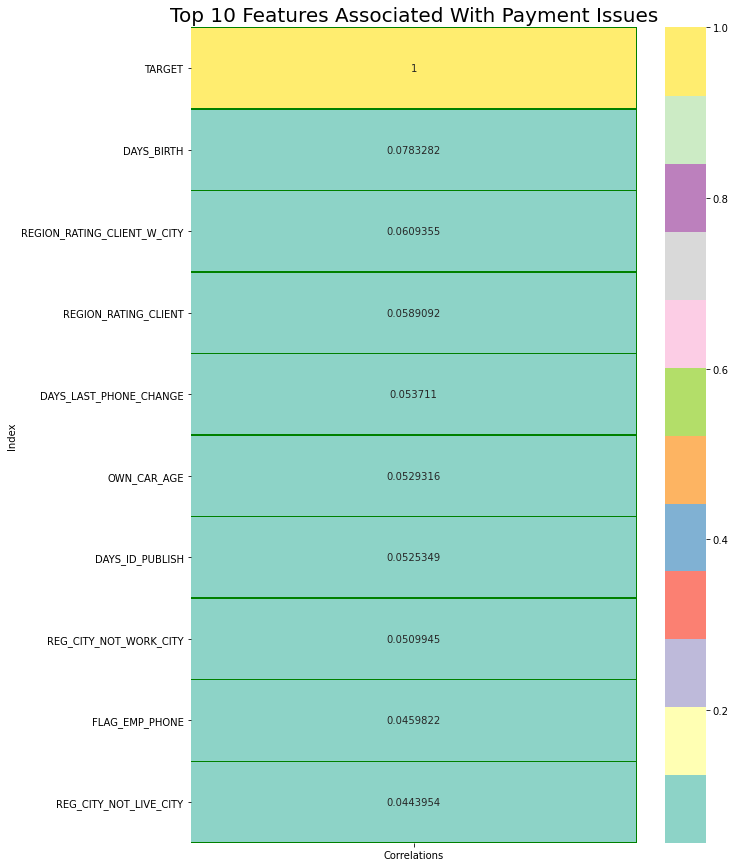

In [11]:
issue_corr = application_train['TARGET'] == 1
corr = application_train.corrwith(issue_corr,method='spearman').reset_index()

corr.columns = ['Index','Correlations']
corr = corr.set_index('Index')
corr = corr.sort_values(by=['Correlations'], ascending = False).head(10)

plt.figure(figsize=(10, 15))
fig = sns.heatmap(corr, annot=True, fmt="g", cmap='Set3', linewidths=0.4, linecolor='green')

plt.title("Top 10 Features Associated With Payment Issues", fontsize=20)
plt.show()

In [12]:
correlations=application_train.corr()['TARGET'].sort_values(ascending = False)

print('Most Positive Correlations:\n', correlations.head(15))
#print('\nMost Negative Correlations:\n', correlations.tail(15))

Most Positive Correlations:
 TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055219
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64


The top 3 features correlated with payment issues are the age of the client and the region rating with and without taking the home city into account. The days since the last phone change was the 4th largest correlation with payment issues.

#### 3.5. Distribution of Target column

The target is what we are asked to predict: either a 0 for the loan was repaid on time, or a 1 indicating the client had payment difficulties. We can first examine the number of loans falling into each category.

In [13]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

#### 3.6. Data imbalance

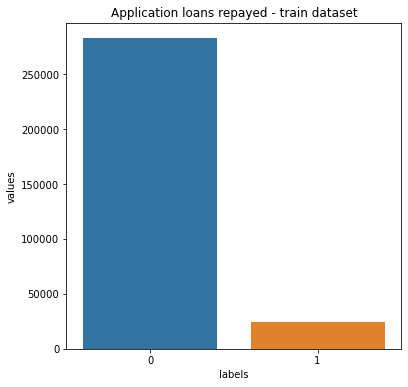

In [14]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

From this information, we see that this is an imbalanced class problem. There are way more loans that were repaid on time than loans that were not repaid. Once we get into more sophisticated machine learning models, we can weight the classes by their representation in the data to reflect this imbalance.

#### 3.7. Distribution of loan types 

In [15]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = application_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = application_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show()

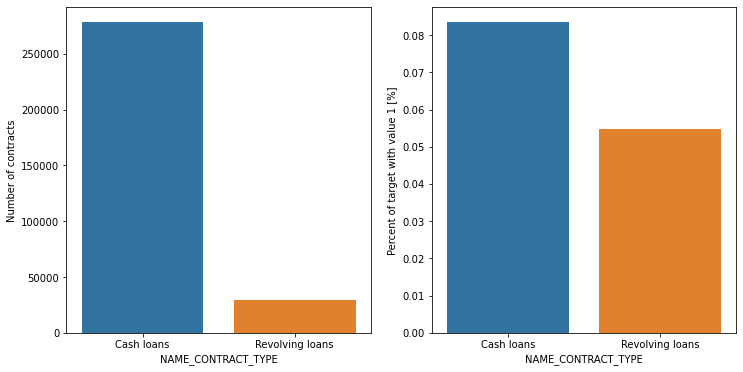

In [16]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type 'Revolving loans' are just a small fraction (10%) from the total number of loans; at the same time, a larger amount of revolving loans, comparing with their frequency, are not repaid.

**Income Ranges of All Applicants By Loan Type**

In [17]:
# The total income value will be split b/w 5 categories to make it easier to use
application_train['INCOME_VAL'] = pd.cut(application_train.AMT_INCOME_TOTAL, bins=[0,50000,150000,300000,500000,1000000], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [18]:
application_train['INCOME_VAL'].value_counts()

Low          150772
Medium       129483
High          20037
Very Low       4517
Very High      2452
Name: INCOME_VAL, dtype: int64

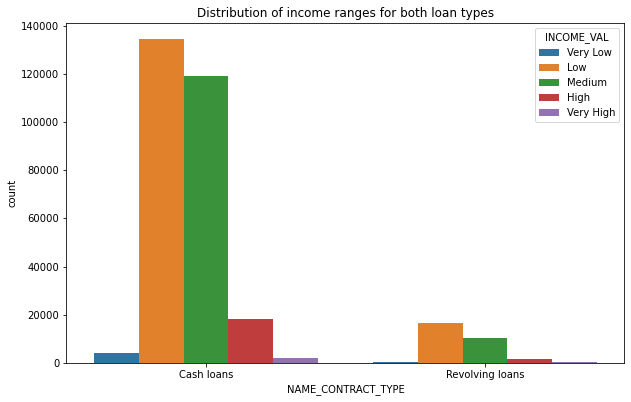

In [19]:
plt.figure(figsize=(10,6.25))
ax_1 = sns.countplot(x='NAME_CONTRACT_TYPE', hue='INCOME_VAL', data= application_train)
plt.title('Distribution of income ranges for both loan types')
plt.show()

#### 3.8. Distribution of Age

In [20]:
#Converting the values in columns starting with 'DAYS' to absolute
application_train['DAYS_BIRTH']= abs(application_train['DAYS_BIRTH'])

In [21]:
print(application_train.DAYS_BIRTH.unique())

[ 9461 16765 19046 ...  7951  7857 25061]


In [22]:
# Days_birth column has the age of the client in days and the datatype is float
# Converting the age to years and the datatype to int
application_train.DAYS_BIRTH = ((application_train.DAYS_BIRTH)/365).astype('int')

In [23]:
application_train.DAYS_BIRTH.describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

In [24]:
#Let's bin the birth data to make it easier to use.
application_train['DAYS_BIRTH_BINS']=pd.cut(application_train.DAYS_BIRTH, bins=[18,40,60,100], labels=['Young','Middle_Age','Senior'])

In [25]:
application_train['DAYS_BIRTH_BINS'].value_counts()

Middle_Age    142220
Young         135923
Senior         29368
Name: DAYS_BIRTH_BINS, dtype: int64

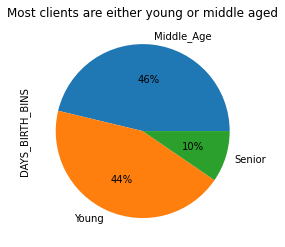

In [26]:
fig =plt.subplots(1,1,figsize=[15,4])
plt.subplot(1,2,1)

application_train.DAYS_BIRTH_BINS.value_counts().plot.pie(autopct='%1.0f%%')
plt.title('Most clients are either young or middle aged')
plt.show()

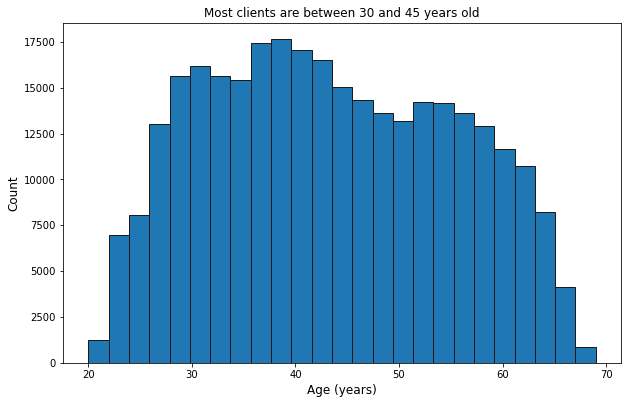

In [27]:
plt.figure(figsize=(10,6.25))
plt.hist(application_train['DAYS_BIRTH'], edgecolor='k',bins=25)
plt.title('Most clients are between 30 and 45 years old', fontsize = 12)
plt.xlabel('Age (years)', fontsize = 12)
plt.ylabel('Count', fontsize = 12)

plt.show()

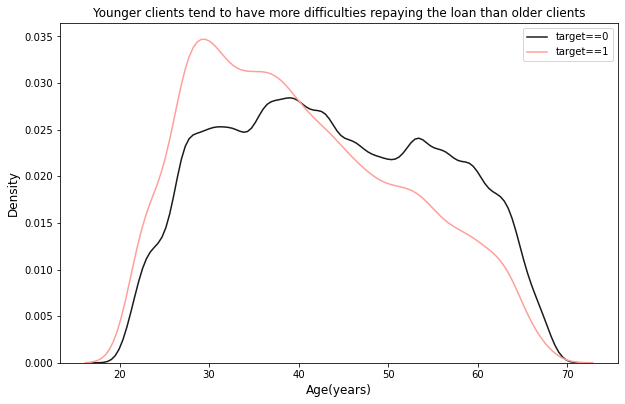

In [28]:
plt.figure(figsize=(10,6.25))

# (TARGET=0)
sns.kdeplot(application_train.loc[application_train['TARGET']==0,'DAYS_BIRTH'],label='target==0', color = 'k')

# (TARGET=1)
sns.kdeplot(application_train.loc[application_train['TARGET']==1,'DAYS_BIRTH'],label='target==1', color = 'r')

plt.xlabel('Age(years)', fontsize = 12)
plt.ylabel('Density', fontsize = 12)
plt.title('Younger clients tend to have more difficulties repaying the loan than older clients', fontsize = 12)

plt.show()

#### 3.9. Failure to repay by age group

In [29]:
# Failure to repay by age group
np.linspace(20,70,num=11)

array([20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.])

In [30]:
age_data=application_train[['TARGET','DAYS_BIRTH']]

# Bin the age data
age_data['YEARS_BINNED']=pd.cut(age_data['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))
age_data.head(10)

<ipython-input-30-74ee10f64f49>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['YEARS_BINNED']=pd.cut(age_data['DAYS_BIRTH'],bins=np.linspace(20,70,num=11))


,TARGET,DAYS_BIRTH,YEARS_BINNED
0,1,25,"(20.0, 25.0]"
1,0,45,"(40.0, 45.0]"
2,0,52,"(50.0, 55.0]"
3,0,52,"(50.0, 55.0]"
4,0,54,"(50.0, 55.0]"
5,0,46,"(45.0, 50.0]"
6,0,37,"(35.0, 40.0]"
7,0,51,"(50.0, 55.0]"
8,0,55,"(50.0, 55.0]"
9,0,39,"(35.0, 40.0]"


In [31]:
# Group by the bin and calculate averages

age_groups  = age_data.groupby('YEARS_BINNED').mean()

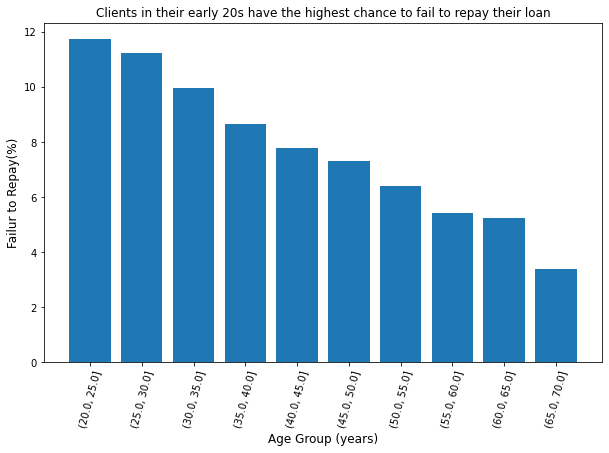

In [32]:
plt.figure(figsize=(10,6.25))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100*age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation=75)
plt.xlabel('Age Group (years)', fontsize = 12)
plt.ylabel('Failur to Repay(%)', fontsize = 12)
#plt.title('Failure to Repay by Age Group', fontsize = 12)
plt.title('Clients in their early 20s have the highest chance to fail to repay their loan', fontsize = 12)

plt.show()

#### 3.10. Clients' family background (family status, children, members)

**Family status**

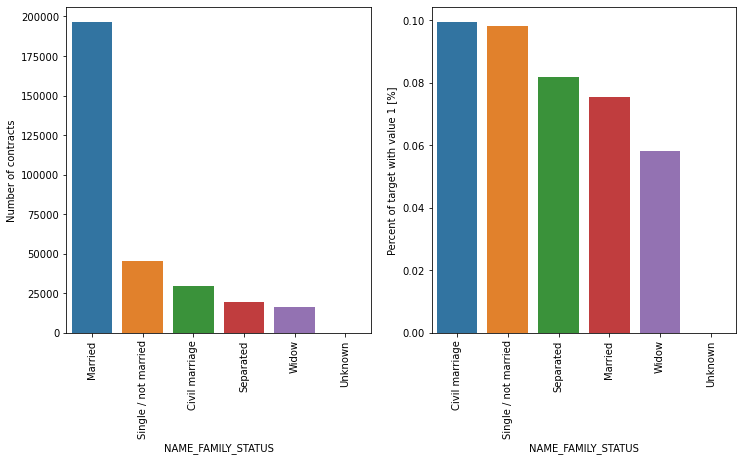

In [33]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Most of clients are married, followed by single/not married and civil marriage. Clients in civil marriage make up the highest percentage (10%) of all clients that didn't repay their loan, while clients with status 'Widow' rank lowest (exception being 'Unknown').

**Number of children**

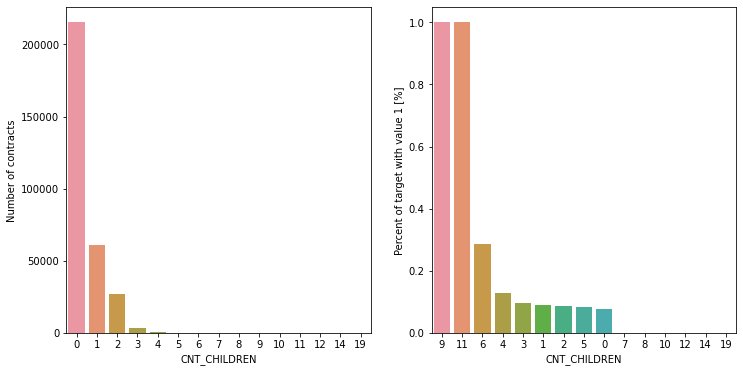

In [34]:
plot_stats('CNT_CHILDREN')

Most of the clients taking a loan have no children. Compared with this number, the number of loans associated with the clients with one child is 4 times smaller, the number of loans associated with the clients with two children is 8 times smaller; clients with 3, 4 or more children are much more rare.
As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children).
As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

**Family members**

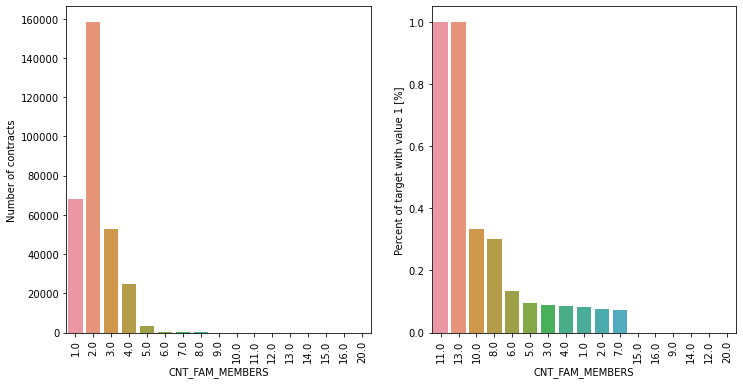

In [35]:
plot_stats('CNT_FAM_MEMBERS',True)

Clients with 2 family members are most common, followed by 1 (single persons), 3 (families with one child) and 4.
100% of clients with family size of 11 and 13 do not repay their loan. Other families with 10 or 8 members show percentages of not repayment of loans over 30%. Families with 6 or less members have repayment rates close to the 10% average.

#### 3.11. Income ranges

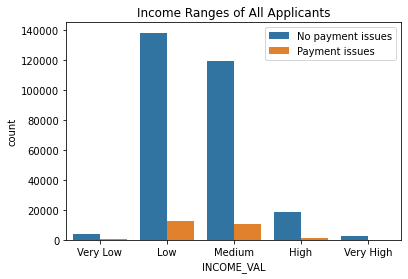

In [36]:
ax_2 = sns.countplot(x='INCOME_VAL', hue='TARGET', data= application_train)
plt.title('Income Ranges of All Applicants')
ax_2.legend(['No payment issues','Payment issues'])
plt.show()

We can see in this barplot that most borrowers fall into the Medium and Low income ranges. This paints a picture as to who is seeking out loans. It makes sense that those on the extremes of the income spectrum would either be unable to secure a loan or not need to secure a loan at all.

#### 3.12. Educational background

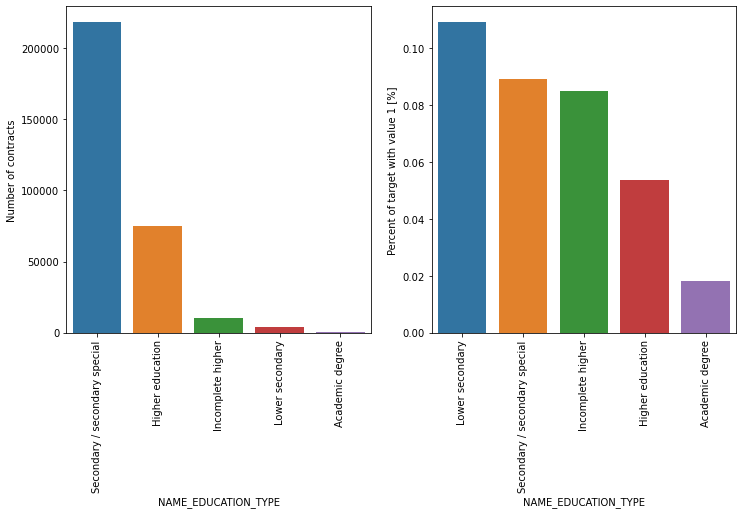

In [37]:
plot_stats('NAME_EDUCATION_TYPE',True)

Majority of the clients have secondary or secondary special education, followed by clients with higher education. Only a very small number of clients having an academic degree.
The lower secondary category, although rare, have the largest rate of not returning the loan (11%). Clients with academic degree have less than 2% not-repayment rate.

#### 3.13. Clients' occupation

**Income type**

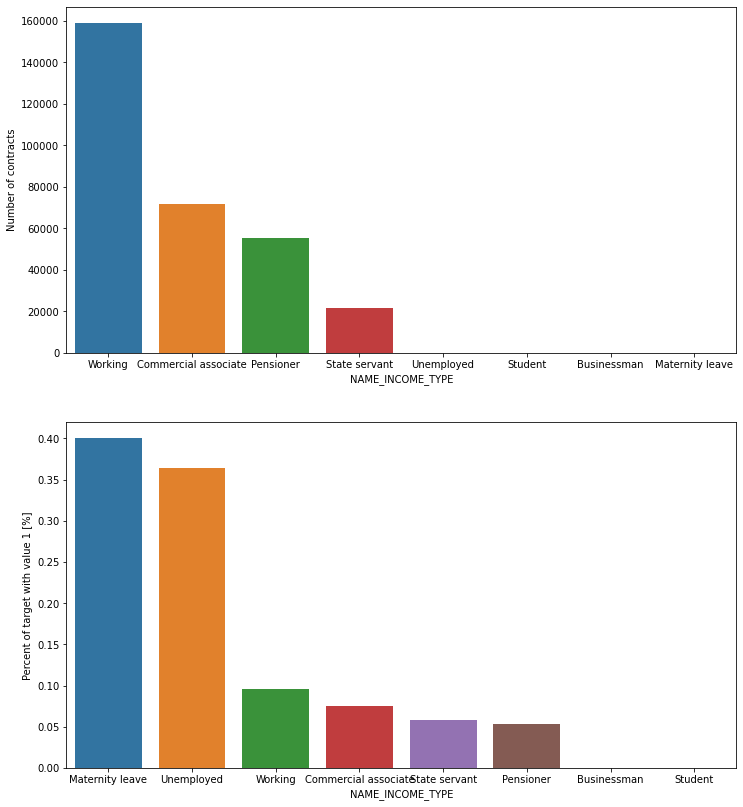

In [38]:
# Income type of client and percent of not returned loans per income type of applicants.

plot_stats('NAME_INCOME_TYPE',False,False)

Most applicants for loans earn income from Working, followed by Commercial associate, Pensioner and State servant.
The applicants on maternity leave show almost 40% ratio of not returning loans, followed by unemployed people (37%). The remaining income types are located under the average of 10% for not returning loans.

**Occupation type**

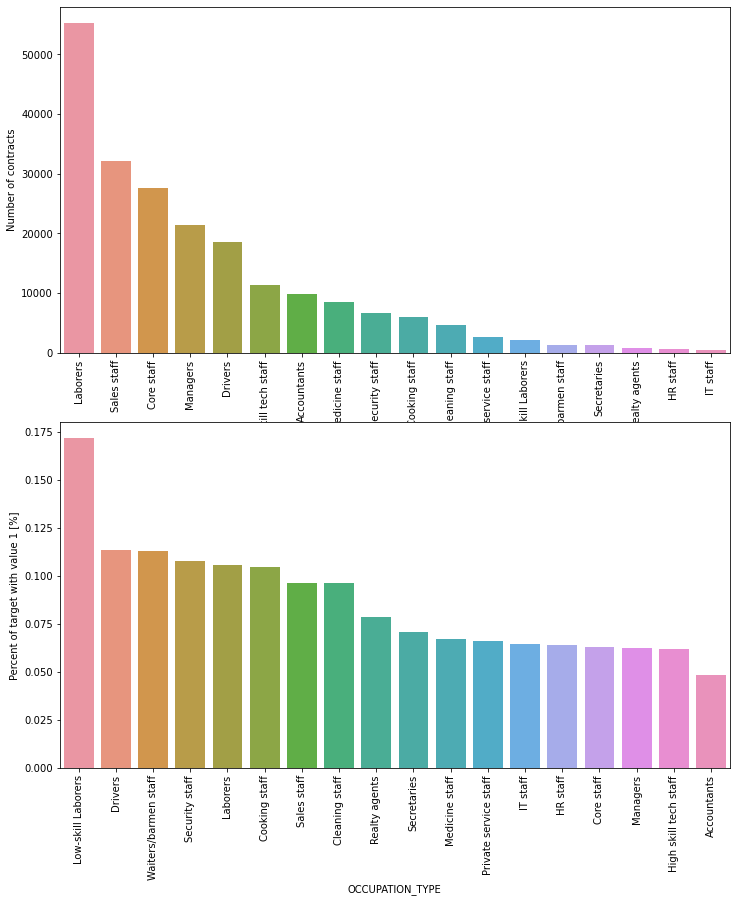

In [39]:
plot_stats('OCCUPATION_TYPE',True, False)

Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
The category with highest percentage of not repaying loans are low-skilled laborers (above 17%), followed by drivers and waiters/barmen staff, security staff, laborers and cooking staff.

#### 3.14. Summary

What have we learned from exploring this data set? We learned what the borrowers look like socio-economically. Most borrowers are ranged from lower to middle income and have secondary education. These borrowers are more likely to be married or be in a relationship at the time of securing the loan. Cash loans are the most popular loan type, favored by the lower and middle class earners. Most loans are given to middle-aged or younger people. The correlations with payment issues brought interesting things to light. The top 3 correlations involved age and region ratings of the applicants.